# AMATH 515 Homework 2

**Due Date: 02/17/2021, 11:59 PM**

Please follow order of this notebook and fill in the `TODO` gaps. Also, please keep the name of this file (`515Hw2_Coding.ipynb`) unchanged, so Gradescope knows what to look for. This time you'll also need to submit `solvers.py`, since it contains your edits. There is no need to submit the dataset (`mnist01.npy`), it is already on Gradescope. You'll have **10 attempts** to complete the assignment. 

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

## Please complete the solvers in `solver.py`

In [2]:
import sys
sys.path.append('./')
from solvers import *

## Problem 3: Compressive Sensing

Consier the following optimization problem,

$$
\min_x~~\frac{1}{2}\|Ax - b\|^2 + \lambda\|x\|_1
$$

In the following part please specify the $f$ and $g$ and use the proximal gradient descent solver to obtain the solution.

In [3]:
# create synthetic dataset
np.random.seed(123)
m = 100  # number of measurements
n = 500  # number of variables
k = 10   # number of nonzero variables
s = 0.05 # measurements noise level

#
A_cs = np.random.randn(m, n)
x_cs = np.zeros(n)
x_cs[np.random.choice(range(n), k, replace=False)] = np.random.choice([-1.0, 1.0], k)
b_cs = A_cs.dot(x_cs) + s*np.random.randn(m)
#
lam_cs = 0.1*norm(A_cs.T.dot(b_cs), np.inf)

In [42]:
# define the function, prox and the beta constant

def func_f_cs(x):
    Ax = A_cs@x
    b = b_cs
    return (0.5)*norm(Ax - b, 2)**2

def func_g_cs(x):
    return lam_cs*norm(x, 1)

def grad_f_cs(x):
    A = A_cs
    Ax = A@x
    b = b_cs
    return A.T@(Ax - b)

def prox_g_cs(x, t):
    return np.sign(x)*np.maximum(np.abs(x) - lam_cs*t, 0)

##==GRADED==##
beta_f_cs = norm(A_cs.T, 2)**2

In [43]:
##==GRADED==##
cs_test_dot = np.ones(n)

# Should be a number
func_cs_test = func_f_cs(cs_test_dot) + func_g_cs(cs_test_dot)

# Should be a numpy vector of shape (n, )
grad_f_cs_test = grad_f_cs(cs_test_dot)

# Should be a numpy vector of shape (n, )
prox_g_cs_test = prox_g_cs(cs_test_dot, 2)

### Proximal gradient descent on compressive sensing

In [44]:
# apply the proximal gradient descent solver
x0_cs_pgd = np.zeros(x_cs.size)

##==GRADED==##
# x_cs_pgd should be (mostly empty) numpy vector of shape (n, )
x_cs_pgd, obj_his_cs_pgd, err_his_cs_pgd, exit_flag_cs_pgd = \
    optimizeWithPGD(x0_cs_pgd, func_f_cs, func_g_cs, grad_f_cs, prox_g_cs, beta_f_cs)

Text(0.5, 1.0, 'Compressive Sensing Signal')

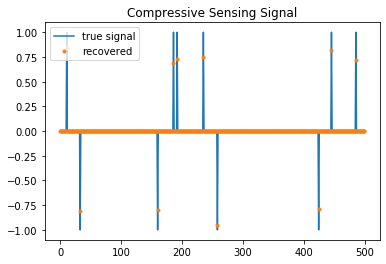

In [45]:
# plot signal result
# The orange dots don't have to be precisely on the tips of the blue peaks, but they should correctly identify them.
plt.plot(x_cs)
plt.plot(x_cs_pgd, '.')
plt.legend(['true signal', 'recovered'])
plt.title('Compressive Sensing Signal')

Text(0.5, 0.98, 'Proximal Gradient Descent on Compressive Sensing')

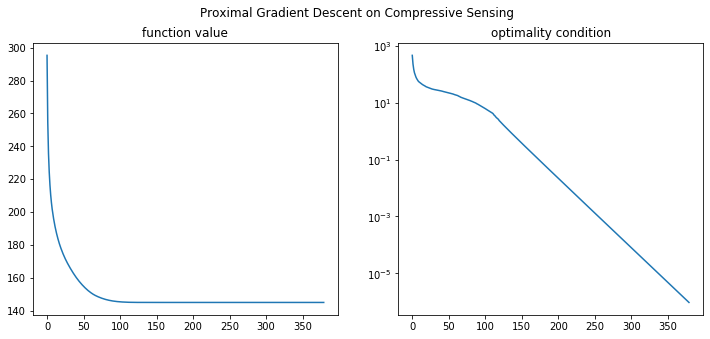

In [46]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_cs_pgd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_cs_pgd)
ax[1].set_title('optimality condition')
fig.suptitle('Proximal Gradient Descent on Compressive Sensing')

### Accelerate proximal gradient descent on compressive sensing

In [47]:
# apply the proximal gradient descent solver
x0_cs_apgd = np.zeros(x_cs.size)
##==GRADED==##
# x_cs_apgd should be (mostly empty) numpy vector of shape (n, )
x_cs_apgd, obj_his_cs_apgd, err_his_cs_apgd, exit_flag_cs_apgd = \
    optimizeWithAPGD(x0_cs_apgd, func_f_cs, func_g_cs, grad_f_cs, prox_g_cs, beta_f_cs)

Text(0.5, 1.0, 'Compressive Sensing Signal')

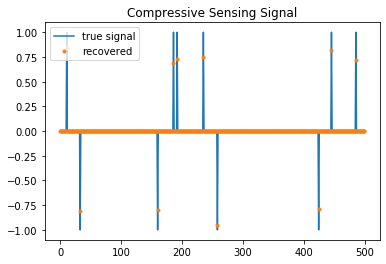

In [48]:
# plot signal result
plt.plot(x_cs)
plt.plot(x_cs_pgd, '.')
plt.legend(['true signal', 'recovered'])
plt.title('Compressive Sensing Signal')

Text(0.5, 0.98, 'Accelerated Proximal Gradient Descent on Compressive Sensing')

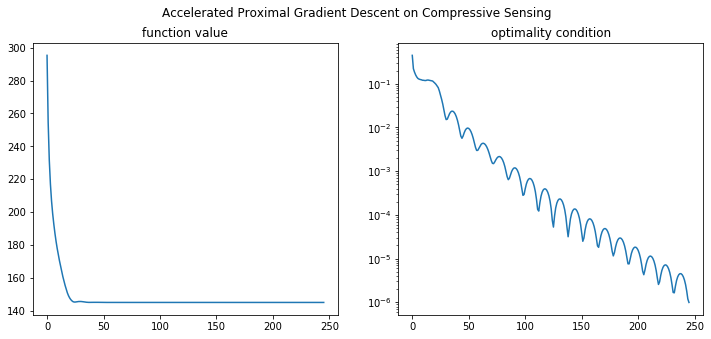

In [49]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_cs_apgd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_cs_apgd)
ax[1].set_title('optimality condition')
fig.suptitle('Accelerated Proximal Gradient Descent on Compressive Sensing')

## Problem 4: Logistic Regression on MINST Data

Now let's play with some real data, recall the logistic regression problem,

$$
\min_x~~\sum_{i=1}^m\left\{\log(1 + \exp(\langle a_i,x \rangle)) - b_i\langle a_i,x \rangle\right\} + \frac{\lambda}{2}\|x\|^2.
$$

Here our data pair $\{a_i, b_i\}$, $a_i$ is the image and $b_i$ is the label.
In this homework problem, let's consider the binary classification problem, where $b_i \in \{0, 1\}$.

In [12]:
# import data
mnist_data = np.load('mnist01.npy', allow_pickle=True)
#
A_lgt = mnist_data[0]
b_lgt = mnist_data[1]
A_lgt_test = mnist_data[2]
b_lgt_test = mnist_data[3]
#
# set regularizer parameter
lam_lgt = 0.1
#
# beta constant of the function
beta_lgt = 0.25*norm(A_lgt, 2)**2 + lam_lgt

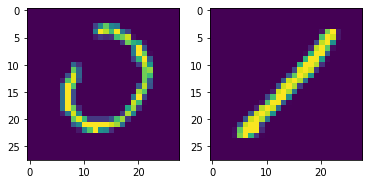

In [13]:
# plot the images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(A_lgt[0].reshape(28,28))
ax[1].imshow(A_lgt[7].reshape(28,28))

In [14]:
# Define the loss function, its gradient and Hessian
# Hint: you can just copy it from your Homework 1. 

def lgt_func(x):
    sum = np.sum
    log = np.log 
    norm = np.linalg.norm
    exp = np.exp
    b = b_lgt
    Ax = A_lgt@x
    return sum(log(1 + exp(Ax))) - sum(b*Ax) + lam_lgt*norm(x)**2/2

def lgt_grad(x):
    A = A_lgt
    Ax = A@x
    b = b_lgt
    exp = np.exp
    l = lam_lgt
    f = lambda x: exp(x)/(1 + exp(x)) - b
    return A.T@f(Ax) + l*x

def lgt_hess(x):
    exp = np.exp
    A = A_lgt
    I = np.eye(len(x))
    l = lam_lgt
    Ax = A@x
    b = b_lgt
    f = lambda x: exp(x)/(1 + exp(x))**2
    return A.T@(f(Ax)[:, np.newaxis]*A) + l*I

### Gradient decsent on logistic regression

In [36]:
# apply the gradient descent
x0_lgt_gd = np.zeros(A_lgt.shape[1])
##==GRADED==##
# x_lgt_gd should be a numpy vector of shape (784, )
x_lgt_gd, obj_his_lgt_gd, err_his_lgt_gd, exit_flag_lgt_gd = \
    optimizeWithGD(x0_lgt_gd, lgt_func, lgt_grad, beta_lgt)

Gradient descent reach maximum number of iteration.


Text(0.5, 0.98, 'Gradient Descent on Logistic Regression')

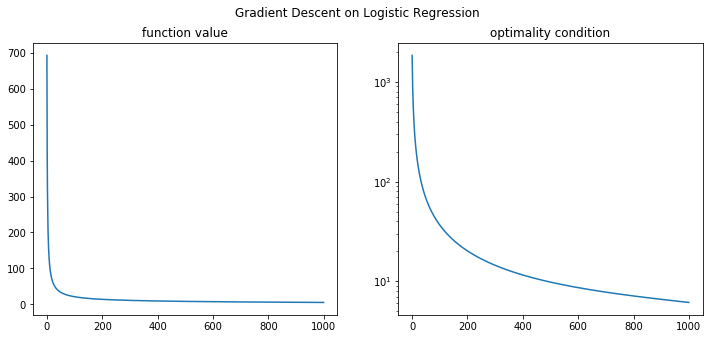

In [33]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_lgt_gd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_gd)
ax[1].set_title('optimality condition')
fig.suptitle('Gradient Descent on Logistic Regression')

### Accelerate Gradient decsent on logistic regression

In [37]:
# apply the accelerated gradient descent
x0_lgt_agd = np.zeros(A_lgt.shape[1])
##==GRADED==##
# x_lgt_agd should be a numpy vector of shape (784, )
x_lgt_agd, obj_his_lgt_agd, err_his_lgt_agd, exit_flag_lgt_agd = \
    optimizeWithAGD(x0_lgt_agd, lgt_func, lgt_grad, beta_lgt)

Proximal gradient descent reach maximum of iteration


Text(0.5, 0.98, 'Accelerated Gradient Descent on Logistic Regression')

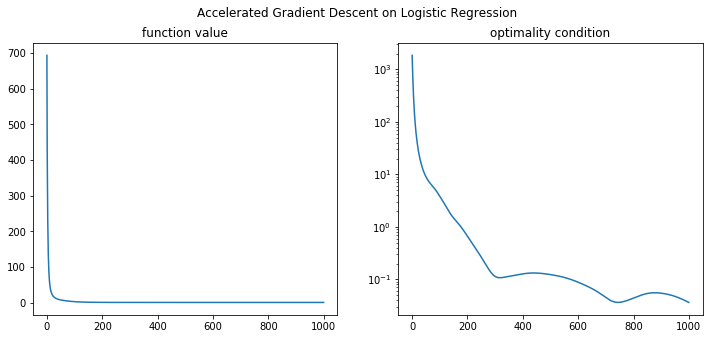

In [38]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_lgt_agd)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_agd)
ax[1].set_title('optimality condition')
fig.suptitle('Accelerated Gradient Descent on Logistic Regression')

### Newton Method on logistic regression

In [25]:
# apply the accelerated gradient descent
x0_lgt_nt = np.zeros(A_lgt.shape[1])
##==GRADED==##
# x_lgt_nt should be a numpy vector of shape (784, )
x_lgt_nt, obj_his_lgt_nt, err_his_lgt_nt, exit_flag_lgt_nt = \
    optimizeWithNT(x0_lgt_nt, lgt_func, lgt_grad, lgt_hess)

Text(0.5, 0.98, "Newton's Method on Logistic Regression")

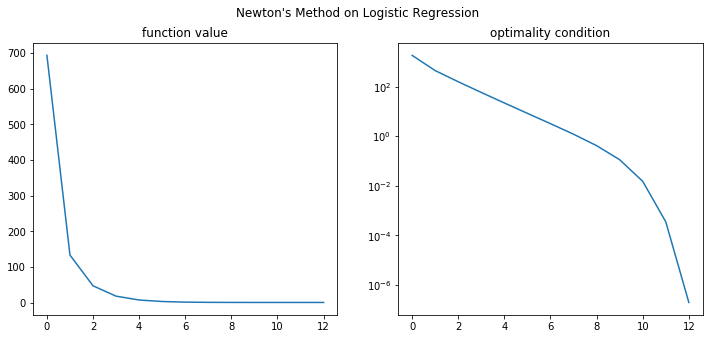

In [39]:
# plot result
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(obj_his_lgt_nt)
ax[0].set_title('function value')
ax[1].semilogy(err_his_lgt_nt)
ax[1].set_title('optimality condition')
fig.suptitle('Newton\'s Method on Logistic Regression')

### Test Logistic Regression

In [40]:
# define accuracy function
def accuracy(x, A_test, b_test):
    r = A_test.dot(x)
    b_test[b_test == 0.0] = -1.0
    correct_count = np.sum((r*b_test) > 0.0)
    return correct_count/b_test.size

In [41]:
print('accuracy of the result is %0.3f' % accuracy(x_lgt_nt, A_lgt_test, b_lgt_test))

accuracy of the result is 1.000
